In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# let us set random seed
np.random.seed(42)

#define the nember of samples - 100
num_samples = 100

#generate the synthetic data
carbon_emission =np.random.uniform(50,400,num_samples) # emissions in kg CO2 units
renewability_index = np.random.uniform(0,1,num_samples) # index from 0 (non renewable) to 1 (renewable)
energy_output = np.random.uniform(100,1000,num_samples) #energy output
cost_efficiency = np.random.uniform(0.5,5, num_samples) # cost efficiency score

#generate a binary target variable based on a condition

sustainibility= [
    1 if (emission < 200 and renewability > 0.5 and cost < 3) else 0
    for emission,renewability,cost in zip(carbon_emission,renewability_index,cost_efficiency)
]

# create the dataframe 
df = pd.DataFrame({
    'carbon_emission':carbon_emission,
    'renewability_index':renewability_index,
    'energy_output':energy_output,
    'cost_efficiency':cost_efficiency,
    'sustainibility':sustainibility
})

In [2]:
# display the first five rows and last five rows
print(df.head())
print(df.tail())

   carbon_emission  renewability_index  energy_output  cost_efficiency  \
0       181.089042            0.031429     677.828482         0.732568   
1       382.750007            0.636410     175.725968         2.891096   
2       306.197880            0.314356     245.465843         2.932858   
3       259.530469            0.508571     908.698770         3.368435   
4       104.606524            0.907566     645.786154         3.767411   

   sustainibility  
0               0  
1               0  
2               0  
3               0  
4               0  
    carbon_emission  renewability_index  energy_output  cost_efficiency  \
95       222.828459            0.349210     570.018934         4.688408   
96       232.956490            0.725956     792.994198         4.362857   
97       199.639356            0.897110     294.238925         2.430473   
98        58.896694            0.887086     660.601428         3.878920   
99        87.761999            0.779876     176.812718      

In [3]:
df.isnull().sum() # to check the missing values - if missing values are present , use df= df.fillna(df.mean())

carbon_emission       0
renewability_index    0
energy_output         0
cost_efficiency       0
sustainibility        0
dtype: int64

In [4]:
df.columns

Index(['carbon_emission', 'renewability_index', 'energy_output',
       'cost_efficiency', 'sustainibility'],
      dtype='object')

In [5]:
# feature selection
x = df[['carbon_emission', 'energy_output','renewability_index','cost_efficiency']] # features
y = df['sustainibility'] # target

In [6]:
# train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [7]:
x_train.shape

(80, 4)

In [8]:
x_test.shape

(20, 4)

In [9]:
# training the model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [1]:
# accuracy score
acc = accuracy_score(y_test,y_pred)
print(f' Accuracy score is {acc}')

NameError: name 'accuracy_score' is not defined

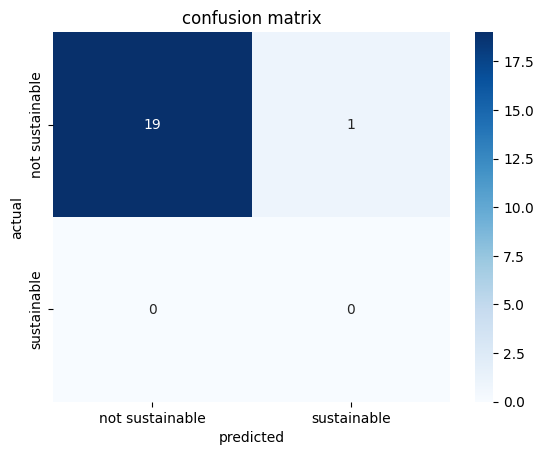

In [14]:
# confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['not sustainable','sustainable'],
            yticklabels =['not sustainable', 'sustainable'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()
         

In [15]:
# classification report
print (classification_report(y_test,y_pred,target_names=['not sustainaible', 'sustainable']))

                  precision    recall  f1-score   support

not sustainaible       1.00      0.95      0.97        20
     sustainable       0.00      0.00      0.00         0

        accuracy                           0.95        20
       macro avg       0.50      0.47      0.49        20
    weighted avg       1.00      0.95      0.97        20



C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [17]:
# feature importance
coef = pd.DataFrame(model.coef_.T,index=x.columns,columns=['Coefficient'])
print(coef)

                    Coefficient
carbon_emission       -0.013189
energy_output          0.001610
renewability_index     1.344090
cost_efficiency       -0.584978


In [19]:
# model deployment
import joblib 
joblib.dump(model,'LogRegSustainable.pkl')

['LogRegSustainable.pkl']